In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Cleaning (na values)

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
transactions_df = pd.read_csv('data/transactions.csv')
oil_df = pd.read_csv('data/oil.csv')
holidays_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

train_df = train_df.drop(columns='id')

In [3]:
# Check for NA Values
for index, df in enumerate([train_df, test_df, transactions_df, oil_df, holidays_df, stores_df]):
    print(f'Df {index}')
    print(df.isna().sum().sum())

Df 0
0
Df 1
0
Df 2
0
Df 3
43
Df 4
0
Df 5
0


In [4]:
# Fill na values

mask = oil_df.isna().sum(axis=1).astype(bool)
# display(oil_df[mask]['date'])
oil_df = oil_df.ffill().bfill()

# EDA
Ideas:
- per product family, viz sales per store
- per store, viz stales per product family
- also 2d facetted, family + sales

- viz per day of week (maybe pointplot aggregations)

In [5]:
train_df['date'] = pd.to_datetime(train_df['date'])

date_min, date_max = train_df['date'].min(), train_df['date'].max()
is_year_start = lambda x : x.month == 1 and x.day == 1
years = np.unique([day for day in train_df['date'] if is_year_start(day)])

In [6]:
train_df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [9]:
store_fam_pivot = pd.pivot(train_df, index='date', values='sales', columns=['store_nbr', 'family'])
store_fam_pivot.head()

store_nbr           1                                                \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0        0.000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0      470.652   
2013-01-03        3.0       0.0    0.0     919.0   0.0      310.655   
2013-01-04        3.0       0.0    3.0     953.0   0.0      198.366   
2013-01-05        5.0       0.0    3.0    1160.0   0.0      301.057   

store_nbr                                        ...         9           \
family     CELEBRATION CLEANING  DAIRY     DELI  ... MAGAZINES    MEATS   
date                                             ...                      
2013-01-01         0.0      0.0    0.0    0.000  ...       0.0    0.000   
2013-01-02         0.0   1060.0  579.0  164.069  ...       0.0  374.531   
2013-01-03         0.0    836.0  453.0  151.582  ...       0.0  400.863   
2013-01-04         0.0    827.0  460.0  131.411  ...       0.0  310.878   
2013-01-05         0.0    811.0  464.0  118.613  ...       0.0  447.685   

store_nbr                                                               \
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS  POULTRY   
date                                                                     
2013-01-01           0.0          0.0                     0.0    0.000   
2013-01-02         482.0          0.0                     0.0  651.292   
2013-01-03         372.0          0.0                     0.0  509.496   
2013-01-04         324.0          0.0                     0.0  332.672   
2013-01-05         461.0          0.0                     0.0  510.919   

store_nbr                                                             
family     PREPARED FOODS PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                  
2013-01-01            0.0     0.0                        0.0   0.000  
2013-01-02           83.0     0.0                        0.0  29.214  
2013-01-03           66.0     0.0                        0.0  25.000  
2013-01-04           57.0     0.0                        0.0  11.000  
2013-01-05           84.0     0.0                        0.0  28.361  

[5 rows x 1782 columns]

In [6]:
by_family = train_df.pivot_table(index='date', columns='family', values='sales', aggfunc='mean')
# by_family.plot(kind='line')
# sns.lineplot(data='df')

<Axes: xlabel='date'>

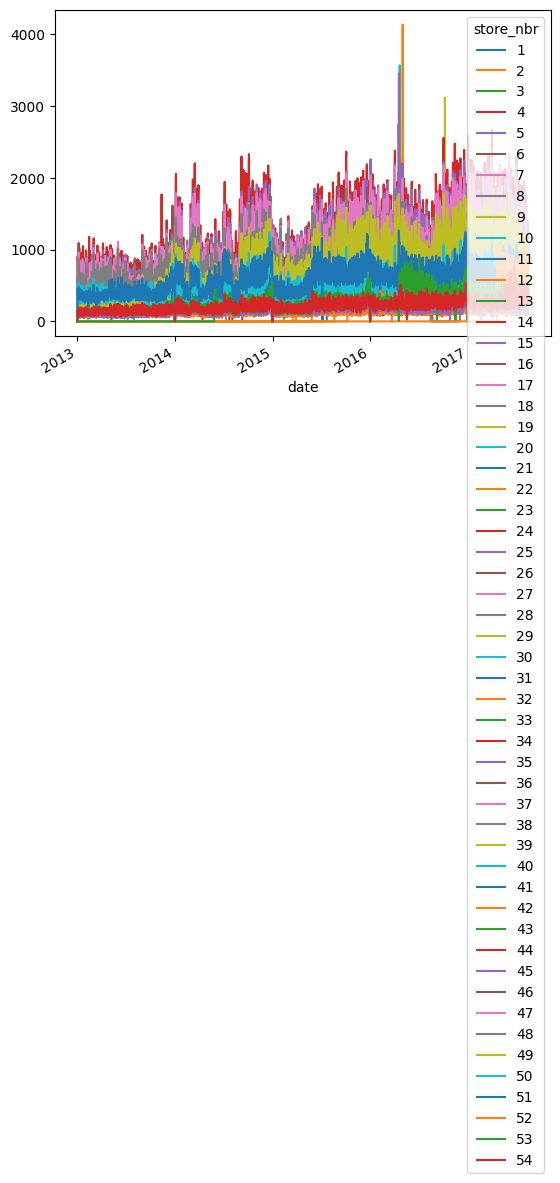

In [7]:
store_group = train_df.pivot_table(index='date', columns='store_nbr', values='sales', aggfunc='mean')
store_group.plot(kind='line')

<Axes: xlabel='date', ylabel='sales'>

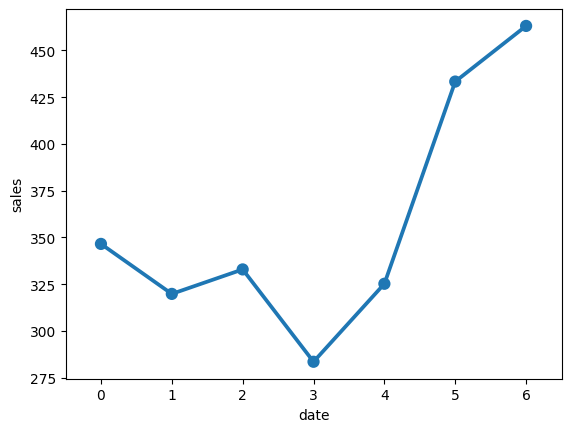

In [10]:
sns.pointplot(x=train_df['date'].dt.day_of_week, y=train_df['sales'], ci=False)

<Axes: xlabel='date'>

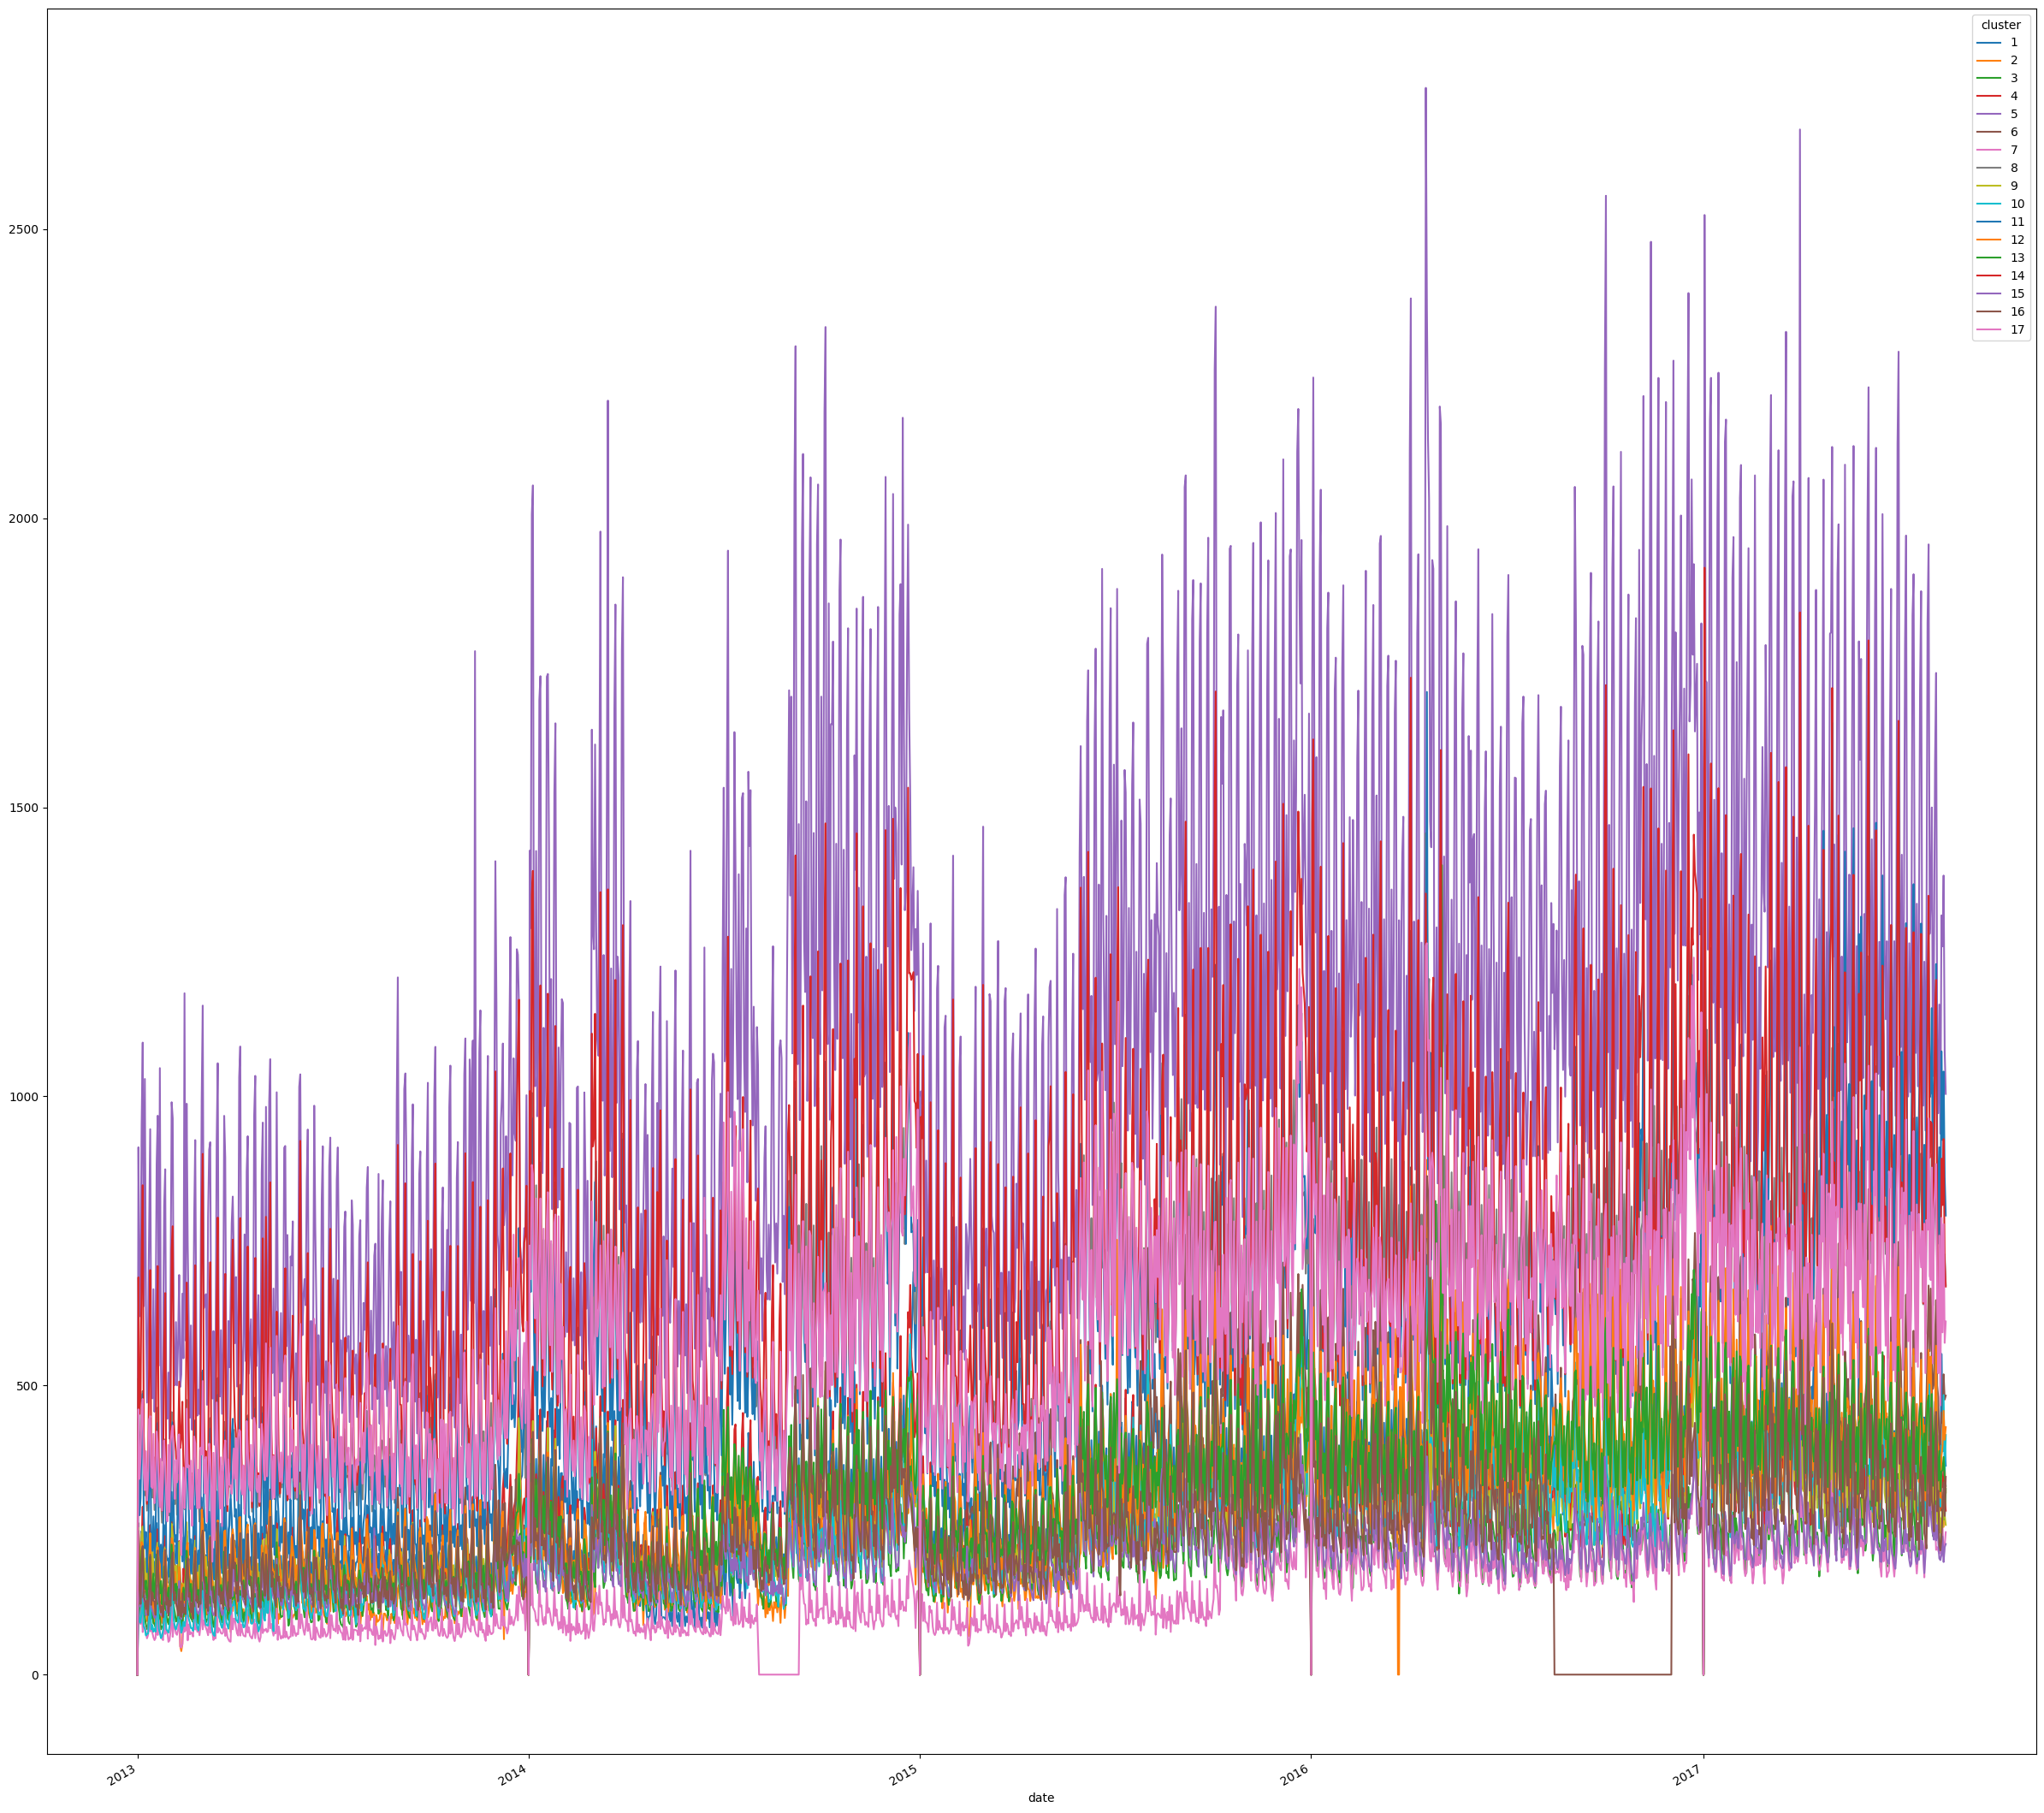

In [11]:
# within a cluster, how different are the sales
combined_train = pd.merge(train_df, stores_df, on='store_nbr', how='left')
by_type = combined_train.pivot_table(index='date', columns='cluster', values='sales', aggfunc='mean')

by_type.plot(kind='line', figsize=(30, 30))

In [35]:
family_df = train_df.pivot(index=['date', 'store_nbr'], columns='family', values='sales')
family_df = family_df.reset_index()
family_df

family,date,store_nbr,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,2013-01-01,1,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
1,2013-01-01,2,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
2,2013-01-01,3,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
3,2013-01-01,4,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
4,2013-01-01,5,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,2017-08-15,50,11.0,0.0,16.0,3661.0,0.0,466.130,45.0,1322.0,...,13.0,425.802,396.0,9.0,22.0,356.510,73.852,2027.374,219.0,15.314
90932,2017-08-15,51,11.0,0.0,2.0,3860.0,0.0,704.801,16.0,1357.0,...,13.0,567.849,234.0,15.0,25.0,686.941,91.976,5031.190,0.0,52.876
90933,2017-08-15,52,2.0,0.0,4.0,3744.0,0.0,756.481,15.0,1412.0,...,19.0,435.828,278.0,9.0,20.0,397.340,104.418,3803.368,17.0,7.000
90934,2017-08-15,53,9.0,0.0,7.0,1646.0,0.0,380.199,4.0,706.0,...,5.0,185.798,153.0,5.0,5.0,148.015,37.820,1432.489,0.0,5.000


In [56]:
graph_df = family_df.set_index('date')
graph_df.drop

family,store_nbr,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
2013-01-01,2,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
2013-01-01,3,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
2013-01-01,4,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
2013-01-01,5,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,50,11.0,0.0,16.0,3661.0,0.0,466.130,45.0,1322.0,1018.0,...,13.0,425.802,396.0,9.0,22.0,356.510,73.852,2027.374,219.0,15.314
2017-08-15,51,11.0,0.0,2.0,3860.0,0.0,704.801,16.0,1357.0,1377.0,...,13.0,567.849,234.0,15.0,25.0,686.941,91.976,5031.190,0.0,52.876
2017-08-15,52,2.0,0.0,4.0,3744.0,0.0,756.481,15.0,1412.0,1053.0,...,19.0,435.828,278.0,9.0,20.0,397.340,104.418,3803.368,17.0,7.000


<Axes: xlabel='date', ylabel='sales'>

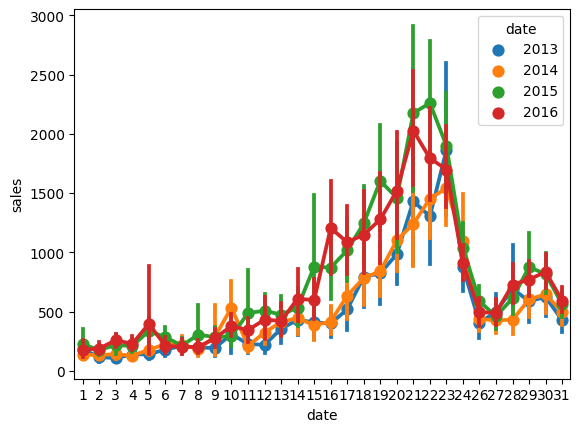

In [13]:
frozen = train_df[(train_df['family'] == 'FROZEN FOODS') & (train_df['date'].dt.month == 12)]
sns.pointplot(x=frozen['date'].dt.day, y=frozen['sales'], hue=frozen['date'].dt.year)

<Axes: xlabel='date', ylabel='sales'>

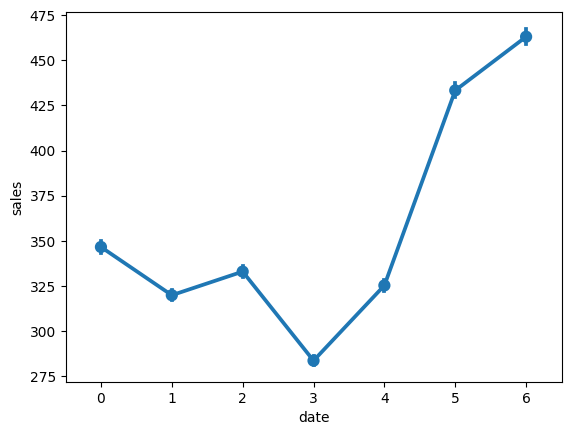

In [15]:
sns.pointplot(x=train_df['date'].dt.day_of_week, y=train_df['sales'])

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

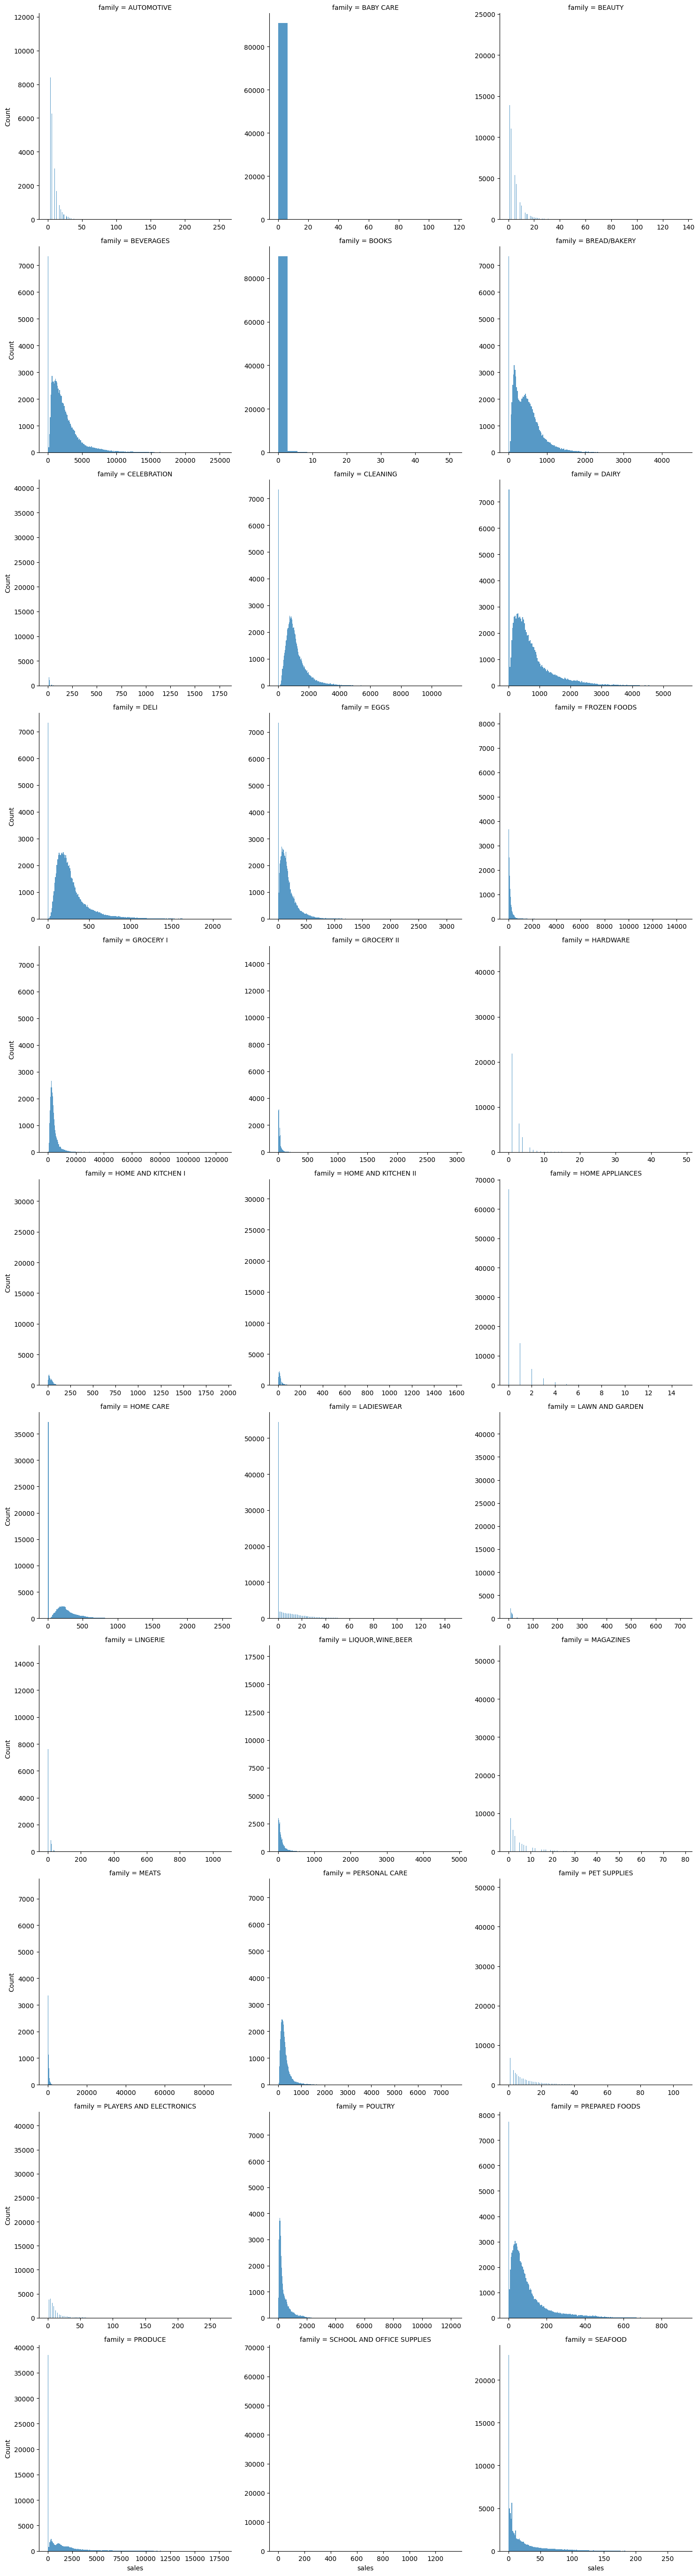

In [28]:
train_copy = train_df.copy()
train_copy['day'] = train_copy['date'].dt.day_of_week
group_sales_day = train_copy.groupby(['day', 'family']).mean()

sns.displot(data=train_copy, x='sales', kind='hist', col='family', col_wrap=3, common_bins=False, facet_kws={'sharex': False, 'sharey': False})